In [1]:
import csv

#/Users/farahbouassida/data-insights/data/SPN_data.csv
high_array = []
volume_array = []
with open('../data/SPN_data.csv', 'rb') as csvfile:
    spamreader = csv.reader(csvfile, delimiter=',', quotechar=',')
    next(spamreader)
    for row in spamreader:
        #print row
        high_array.append((row[0],row[2]))
        volume_array.append((row[0],row[6]))

In [2]:
earthquake_days = []

with open('../data/earthquakes_data.csv', 'rb') as csvfile:
    spamreader = csv.reader(csvfile, delimiter=',', quotechar=',')
    next(spamreader)
    for row in spamreader:
        if(float(row[4])>= 4.5): earthquake_days.append((row[0],40))

In [3]:
def remove_time(date):
    id = date.find('T')
    return date[:id]

In [4]:
earthquake_days = map(lambda (x,y): (remove_time(x),y) , earthquake_days)
print earthquake_days[0]

('2018-04-09', 40)


In [5]:
from matplotlib import pyplot as plt
import matplotlib.dates as mdates
import datetime
import numpy as np
import pandas as pd

In [6]:
earth_ts = zip(*earthquake_days)
high_ts = zip(*high_array)

In [7]:
dates_eq = pd.to_datetime(earth_ts[0], format='%Y/%m/%d')
dates_spn = pd.to_datetime(high_ts[0], format='%Y/%m/%d')

In [9]:
high_ts[1] = map(float,high_ts[1])
#df = pd.DataFrame(np.array(high_ts[1]), index=dates_spn)

In [216]:
ax = df.plot(figsize=(20,20))
df1 = pd.DataFrame(np.array(earth_ts[1]), index=dates_eq[::-1])
df1.plot(kind='bar',ax=ax, stacked=True)

ValueError: ordinal must be >= 1

Error in callback <function post_execute at 0x10d01ee60> (for post_execute):


ValueError: ordinal must be >= 1

ValueError: ordinal must be >= 1

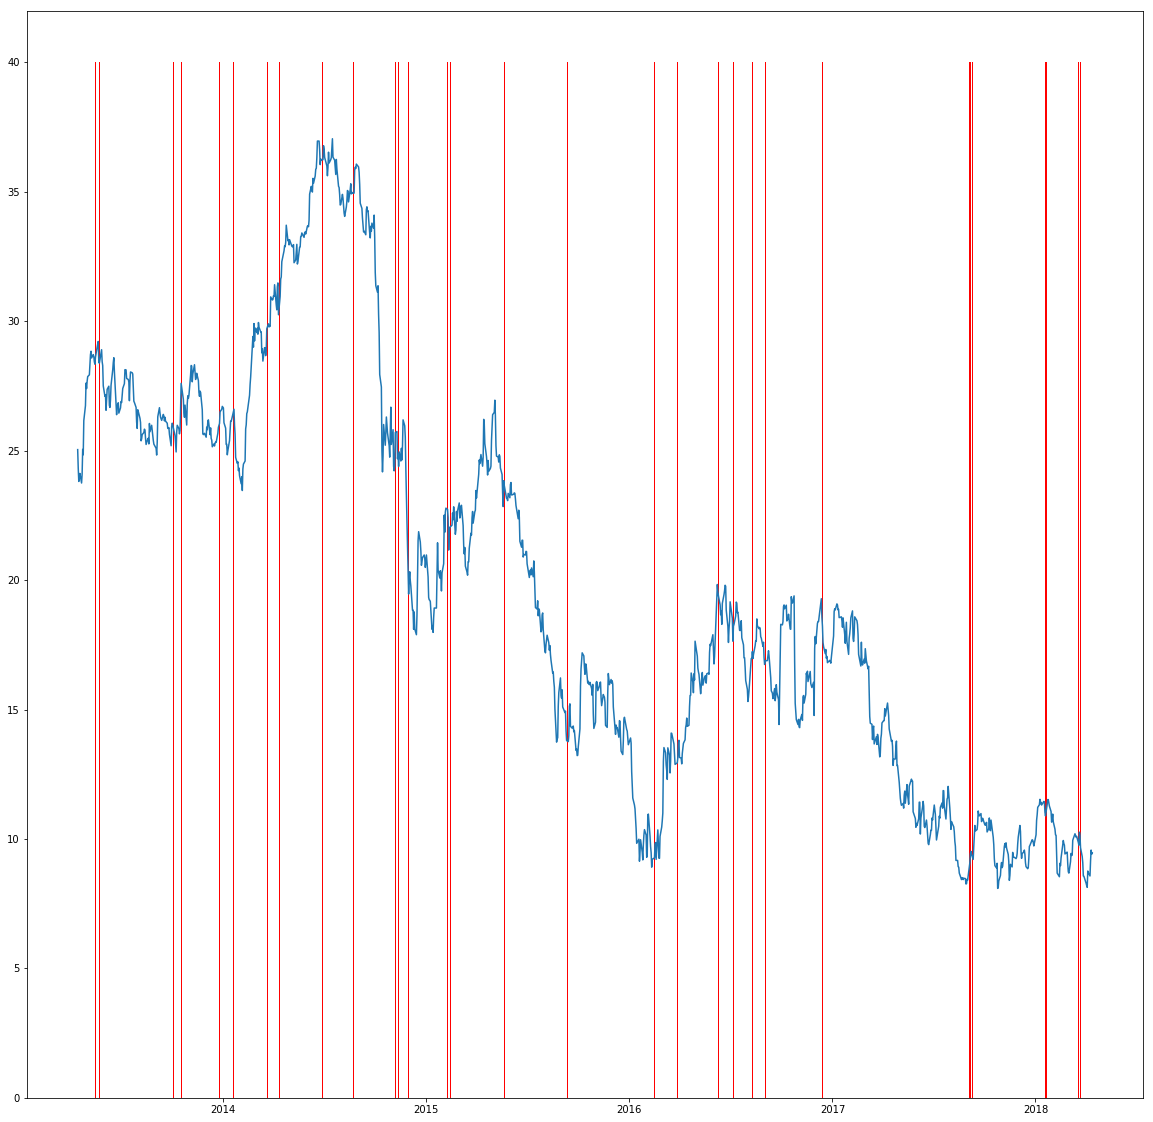

In [11]:
fig = plt.figure(figsize=(20,20))

ax = fig.add_subplot(111)
ax.bar(dates_eq[::-1], np.array(earth_ts[1]),color='red')
ax.plot(dates_spn, np.array(high_ts[1]))
plt.draw()

In [15]:
plt.savefig('../data/spn_vs_earthquake',format='pdf')

In [214]:
dates_eq[::-1]

DatetimeIndex(['2013-05-17', '2013-05-24', '2013-05-24', '2013-05-24',
               '2013-05-29', '2013-06-07', '2013-09-15', '2013-09-21',
               '2013-09-21', '2013-09-21',
               ...
               '2017-11-13', '2018-01-19', '2018-01-19', '2018-01-20',
               '2018-01-21', '2018-03-19', '2018-03-23', '2018-04-05',
               '2018-04-07', '2018-04-09'],
              dtype='datetime64[ns]', length=107, freq=None)

In [211]:
dates_spn

DatetimeIndex(['2013-04-15', '2013-04-16', '2013-04-17', '2013-04-18',
               '2013-04-19', '2013-04-22', '2013-04-23', '2013-04-24',
               '2013-04-25', '2013-04-26',
               ...
               '2018-04-02', '2018-04-03', '2018-04-04', '2018-04-05',
               '2018-04-06', '2018-04-09', '2018-04-10', '2018-04-11',
               '2018-04-12', '2018-04-13'],
              dtype='datetime64[ns]', length=1260, freq=None)